In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
# Any results you write to the current directory are saved as output.

['train_V2.csv', 'test_V2.csv', 'sample_submission_V2.csv']


In [2]:
# improt training data
train_df = pd.read_csv('../input/train_V2.csv')
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
# import training data
test_df = pd.read_csv('../input/test_V2.csv')
test_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [4]:
train_df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [5]:
# feaature engineering
continuous_features = ['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']

In [6]:
#check for nulls in features
train_df[continuous_features].isnull().sum().sum()

0

In [7]:
#check for nulls in Y
train_df['winPlacePerc'].isnull().sum().sum()

1

In [8]:
len(train_df)

4446966

In [9]:
train_df_final = train_df.dropna(axis=0)
len(train_df_final)

4446965

> One value missing - need to remove

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


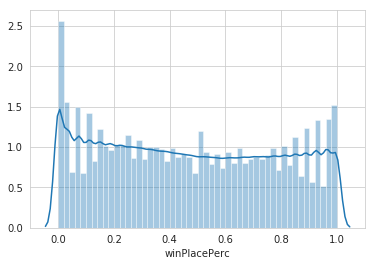

In [10]:
sns.distplot(train_df_final['winPlacePerc'])

In [11]:
#training
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [12]:
def create_model(y,X):
    model = Sequential()
    print(X.shape[1])
    model.add(Dense(10, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(5,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X,y,epochs=5, batch_size=200,)
    return model

In [13]:
%%time
dnn = create_model(y =train_df_final['winPlacePerc'], X = train_df_final[continuous_features] )

24
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4446965/4446965 [==============================] - 61s 14us/step - loss: 0.0192
Epoch 2/5
4446965/4446965 [==============================] - 59s 13us/step - loss: 0.0139
Epoch 3/5
4446965/4446965 [==============================] - 59s 13us/step - loss: 0.0119
Epoch 4/5
4446965/4446965 [==============================] - 59s 13us/step - loss: 0.0112
Epoch 5/5
4446965/4446965 [==============================] - 59s 13us/step - loss: 0.0110


In [17]:
#errors = train_df_final['winPlacePerc'] - dnn.predict( train_df_final[continuous_features])
#sns.distplot(errors)

## Predictions

In [18]:
test_df = pd.read_csv('../input/test_V2.csv')
test_df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,1294,4,2,69.27,1292,squad-fpp,22,20,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,1449,0,0,0.00,1301,squad-fpp,27,26,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,0,1,1,25.38,1314,squad-fpp,29,29,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,0,1,1,67.89,1333,duo-fpp,49,48,1456,1,0.0,0,0.000,0,0,1893.00,4,0
1934173,3696fc9f3a42b2,c770d7feaf020f,9d4e2b6d506fd0,0,0,19.80,0,0,0,86,1380,0,0,0.00,1863,squad-fpp,28,27,-1,0,0.0,0,0.000,0,0,68.89,0,1551


In [32]:
predictions =dnn.predict(test_df[continuous_features])

In [40]:
df_sub = pd.DataFrame()
df_sub['Id'] = test_df['Id']
df_sub['winPlace_perc']  = predictions

In [41]:
df_sub.head()

,Id,winPlace_perc
0,9329eb41e215eb,0.245491
1,639bd0dcd7bda8,0.894250
2,63d5c8ef8dfe91,0.655082
3,cf5b81422591d1,0.574534
4,ee6a295187ba21,0.890243


In [44]:
#df_sub.to_csv('submission_adjusted.csv', index = False)
df_sub.to_csv('submission.csv', index = False)